<center> <span style="color:indigo">Machine Learning e Inferencia Bayesiana</span> </center> 

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Centro_Universitario_del_Guadalajara_Logo.png/640px-Centro_Universitario_del_Guadalajara_Logo.png" alt="Drawing" style="width: 600px;"/>
</center>
    
<center> <span style="color:DarkBlue">  Tema 13: Redes neuronales, fundamentos de pytorch </span>  </center>
<center> <span style="color:Blue"> M. en C. Iván A. Toledano Juárez </span>  </center>

# Fundamentos de PyTorch

Basado en notas de **mrdbourke**. Ejemplo es corrido en Google Colab, utilizando GPU y TPU's.

PyTorch es una de las bibliotecas más populares y poderosas para el desarrollo de modelos de **aprendizaje automático** y especialmente de **aprendizaje profundo (deep learning)**. Desarrollada por **Facebook AI Research (FAIR)** y lanzada en 2016, PyTorch se ha convertido en una herramienta esencial tanto en la investigación como en aplicaciones industriales, gracias a su flexibilidad, facilidad de uso y compatibilidad con aceleradores como **GPU** y **TPU**.

En este notebook aprenderás los fundamentos prácticos de PyTorch, centrados en la manipulación de su estructura de datos central: el **tensor**. Un tensor es una generalización de matrices y vectores, capaz de representar datos en múltiples dimensiones, y es el bloque fundamental sobre el cual se construyen todos los modelos en PyTorch.

---

## ¿Qué vas a aprender?

Al finalizar esta sección, podrás:

- Comprender qué es un **tensor** y cómo se diferencia de arrays tradicionales como los de NumPy.
- Crear y manipular tensores en CPU y GPU.
- Realizar operaciones matemáticas básicas con PyTorch.
- Cambiar la forma, tipo de datos y dispositivo de los tensores.
- Explorar las primeras nociones de **diferenciación automática**, esenciales para entrenamiento de redes neuronales.


## Referencias 

- Curso base: [mrdbourke/pytorch-deep-learning](https://github.com/mrdbourke/pytorch-deep-learning)
- Documentación oficial: [pytorch.org/docs](https://pytorch.org/docs/stable/index.html)
- Tutoriales oficiales: [PyTorch Tutorials](https://pytorch.org/tutorials/)


In [2]:
# Importación de librerías

# Estandar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

# PyTorch
import torch
print('Version de PyTorch =',torch.__version__)

#!nvidia-smi

Version de PyTorch = 2.8.0
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Tensores [(Documentación)](https://pytorch.org/docs/stable/tensors.html)

En PyTorch, los **tensores** (`torch.Tensor`) son la **estructura de datos fundamental**, y constituyen el bloque básico sobre el que se construyen todos los modelos de machine learning y deep learning.

Un **tensor** es una **generalización de los vectores y matrices** a un número arbitrario de dimensiones:

| Tipo de dato | Ejemplo | Dimensión | Descripción |
|--------------|---------|-----------|-------------|
| Escalar      | `5`     | 0D        | Un solo número |
| Vector       | `[1, 2, 3]` | 1D    | Lista de números |
| Matriz       | `[[1, 2], [3, 4]]` | 2D | Tabla de números |
| Tensor       | `torch.rand(3, 3, 3)` | 3D o más | Cubo o arreglo multidimensional |

Los tensores son **similares a los arrays de NumPy**, pero con capacidades adicionales como:

- Computación acelerada en **GPU**.
- Soporte automático de **gradientes** (para backpropagation).
- Compatibilidad con modelos de deep learning y grafos computacionales.

---

In [3]:
# Crear tensor 

# Escalar
scalar = torch.tensor(7)
print(scalar)
print(type(scalar))
print("\n")

# Vector
vector = torch.tensor([7,7])
print(vector)
print(type(vector))
print("\n")

# Matriz
matrix = torch.tensor([[7,8],
                      [9,10]])
print(matrix)
print(type(matrix))
print("\n")

# Tensor (más dimensiones)
tensor = torch.tensor([[[1,2,3],
                        [3,4,5],
                        [7,8,9]]])
print(tensor)
print(type(tensor))

tensor(7)
<class 'torch.Tensor'>


tensor([7, 7])
<class 'torch.Tensor'>


tensor([[ 7,  8],
        [ 9, 10]])
<class 'torch.Tensor'>


tensor([[[1, 2, 3],
         [3, 4, 5],
         [7, 8, 9]]])
<class 'torch.Tensor'>


In [4]:
# Atributos

# Dimension
print('Rank (escalar) = ', scalar.ndim)
print('Rank (vector) = ', vector.ndim)
print('Rank (Matrix) = ', matrix.ndim)
print('Rank () = ', tensor.ndim)

# Elementos como valor numérico
print(scalar.item())

# Shape
print(scalar.shape)
print(vector.shape)
print(matrix.shape)
print(tensor.shape) # Checar número de brackets en el tensor

Rank (escalar) =  0
Rank (vector) =  1
Rank (Matrix) =  2
Rank () =  3
7
torch.Size([])
torch.Size([2])
torch.Size([2, 2])
torch.Size([1, 3, 3])


In [5]:
matrix[0]

tensor([7, 8])

In [6]:
matrix[1]

tensor([ 9, 10])

In [7]:
vector[0]

tensor(7)

In [8]:
vector[1]

tensor(7)

#### Tensores aleatorios
Por la forma en la cual muchas redes neuronales empiezan, los tensores llenos de números aleatorios son importantes. Después éstos números aleatorios son actualizados para representar mejor a los datos.

---

### Funciones principales

PyTorch ofrece varias funciones para generar tensores con contenido aleatorio:

| Función | Descripción |
|--------|-------------|
| `torch.rand(size)` | Valores aleatorios uniformes en $[0, 1)$ |
| `torch.randn(size)` | Valores aleatorios de una distribución **normal estándar** (media 0, varianza 1) |
| `torch.randint(low, high, size)` | Valores enteros aleatorios en el intervalo $[low, high)$ |
| `torch.rand_like(tensor)` | Tensor aleatorio con la **misma forma** que otro tensor dado |

---


In [12]:
# Definimos el tamaño del tensor
size = (3,4)
#size = (10,10,10)

random_tensor = torch.rand(size)

print(random_tensor)
print(f"shape: {random_tensor.shape}")
print(f"ndim: {random_tensor.ndim}")

tensor([[0.8269, 0.2721, 0.8171, 0.6165],
        [0.5127, 0.5142, 0.7038, 0.0734],
        [0.1335, 0.0706, 0.3844, 0.4012]])
shape: torch.Size([3, 4])
ndim: 2


In [13]:
# Tensores aleatorios con shape similar al de un tensor de imagen
size = (224,224,3) # información (height, width, color channels(r,g,b))

random_image_size_tensor = torch.rand(size=size)
random_image_size_tensor.ndim

3

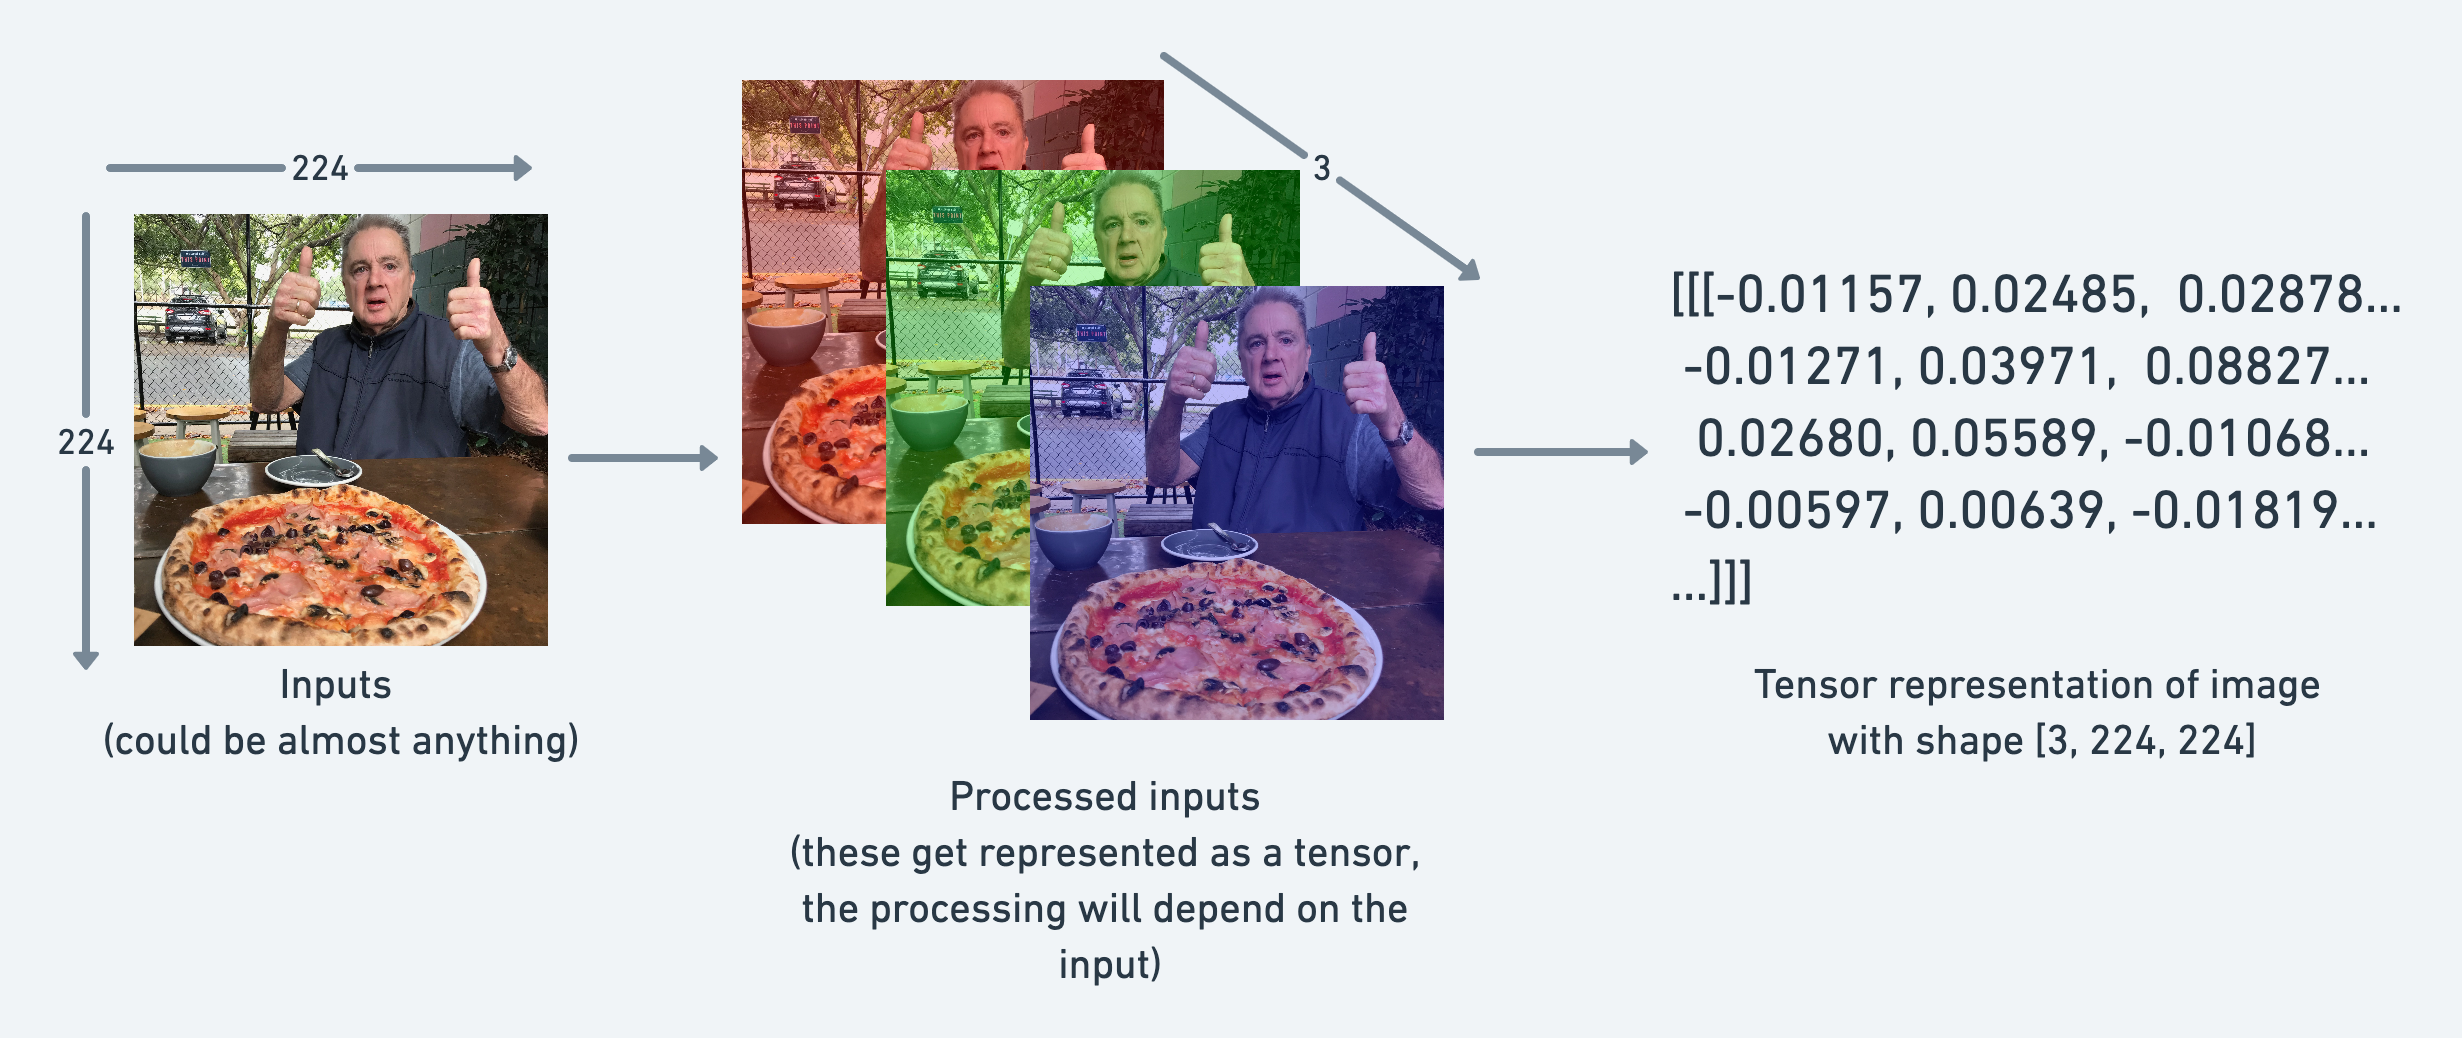

In [14]:
display(Image("imagenes/pytorch_rgb.png"))

In [15]:
# Tensores con 1's o 0's
# Tensor de ceros puede servir como un mask en una imagen

size = (3,4)

zeros = torch.zeros(size=size)
print(zeros)

ones = torch.ones(size=size)
print(ones)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [16]:
# Tipos de objetos dentro de los tensores
ones.dtype

torch.float32

In [17]:
torch.range(0,11) # posiblemente se remueva en el futuro

/var/folders/kk/gbkrt22x1jn_jfmqkw6krfw00000gn/T/ipykernel_14601/465108312.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(0,11) # posiblemente se remueva en el futuro


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [18]:
tensor_range = torch.range(start=1,
                           end=11,
                           step=2)
tensor_range

/var/folders/kk/gbkrt22x1jn_jfmqkw6krfw00000gn/T/ipykernel_14601/2913623987.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  tensor_range = torch.range(start=1,


tensor([ 1.,  3.,  5.,  7.,  9., 11.])

In [19]:
# Crear un tensor de 0 y 1, con el mismo shape de otro tensor anterior

new_tensor = torch.zeros_like(input=tensor_range)
new_tensor

tensor([0., 0., 0., 0., 0., 0.])

### Tipo de objetos dentro de un tensor

Cada tensor en PyTorch contiene **elementos de un tipo de dato específico**, como enteros, flotantes o booleanos. Este tipo se representa con el atributo `.dtype` del tensor. El dtype por default es ``float32``.

Elegir el tipo adecuado es importante porque:

- Afecta el **uso de memoria**.
- Determina la **precisión numérica**.
- Algunas operaciones solo están disponibles para ciertos tipos.

---

#### Tipos comunes de datos (`torch.dtype`)

| Tipo de dato | Descripción | Equivalente NumPy |
|--------------|-------------|-------------------|
| `torch.float32` | Número flotante de 32 bits (por defecto) | `np.float32` |
| `torch.float64` | Número flotante de 64 bits (doble precisión) | `np.float64` |
| `torch.int32`   | Entero de 32 bits | `np.int32` |
| `torch.int64`   | Entero de 64 bits (común para índices) | `np.int64` |
| `torch.bool`    | Booleano (True/False) | `np.bool_` |

In [20]:
float32_tensor = torch.tensor([3.0,6.0,9.0],
                              dtype=None, # dtype
                              device=None, # GPU,CPU,TPU
                              requires_grad=False) # Si es True, las operaciones hechas sobre el tensor son registradas
print(float32_tensor.shape, float32_tensor.dtype, float32_tensor.device)

torch.Size([3]) torch.float32 cpu


In [21]:
float16_tensor = torch.tensor([3.0,6.0,9.0],
                              dtype=torch.float16, # dtype
                              device=None, # GPU,CPU,TPU
                              requires_grad=False) # Si es True, las operaciones hechas sobre el tensor son registradas
print(float16_tensor.shape, float16_tensor.dtype, float16_tensor.device)

torch.Size([3]) torch.float16 cpu


### Operaciones sobre tensores

In [22]:
tensor = torch.tensor([1,2,3])
tensor

tensor([1, 2, 3])

In [23]:
tensor+10

tensor([11, 12, 13])

In [24]:
tensor*10

tensor([10, 20, 30])

In [25]:
tensor

tensor([1, 2, 3])

Para guardar las operaciones sobre los tensores, tenemos que reasignarlos en una variable.

In [26]:
tensor = torch.tensor([1,2,3])
tensor = tensor+10
tensor

tensor([11, 12, 13])

### Multiplicación de matrices en PyTorch

La **multiplicación de matrices** es una operación fundamental tanto en **álgebra lineal** como en **machine learning (ML)** y **deep learning (DL)**. Por ejemplo, en una red neuronal, las entradas son multiplicadas por una matriz de pesos en cada capa. Esta operación se repite millones de veces durante el entrenamiento y la inferencia.

---

### ¿Qué es la multiplicación de matrices?

Dado un par de matrices:

- $A \in \mathbb{R}^{m \times n}$
- $B \in \mathbb{R}^{n \times p}$

Entonces su producto $C = A \times B$ está definido **siempre que las dimensiones internas coincidan** (en este caso, $n$), y el resultado es una matriz de tamaño $m \times p$.

\begin{equation}
\text{Si } A: (m \times n) \text{ y } B: (n \times p), \quad \Rightarrow \quad A @ B: (m \times p)
\end{equation}

Por ejemplo:

- $A$ tiene dimensión `(3 × 4)`
- $B$ tiene dimensión `(4 × 5)`
- Entonces: `A @ B` tendrá dimensión `(3 × 5)`

In [27]:
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

Una confusión común en álgebra lineal y en el uso de PyTorch es la diferencia entre:

- **Producto punto (dot product)**: también llamado producto escalar. Da como resultado un número (escalar).
- **Producto elemento a elemento (Hadamard product)**: opera posición por posición. El resultado es un nuevo vector (o tensor) del mismo tamaño.

Aqui tenemos el vector (1,2,3), al cual podemos multiplicarle su propia expresión de dos formas:

(1,2,3) * (1,2,3) = (1$\times$1) + (2$\times$2) + (3$\times$3) # producto punto / multiplicación de matrices

(1,2,3) * (1,2,3) = (1$\times$1,2$\times$2,3$\times$3) # elemento por elemento

In [28]:
tensor * tensor

tensor([1, 4, 9])

In [29]:
torch.matmul(tensor,tensor)

tensor(14)

El método ``torch.matmul()``es más eficiente y veloz para este tipo de operaciones, así que es el recomendado a utilizar.


### Errores comunes en Deep Learning: `shape`, `dtype`, `device`

Por lo mismo que hay mucha manipulación de tensores en DL, muchos de los errores técnicos vienen ligados a problemas de shape,dtype,device.

- Formas incompatibles (`shape`)
- Tipos de datos distintos (`dtype`)
- Tensores en diferentes dispositivos (`device`)

---

In [30]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

Si fuera el problema, aquí tendríamos que hacer que las dimensiones internas coincidan.

In [31]:
# Utilizamos la transpuesta de este vector
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [32]:
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [34]:
# Una sintaxis de matmul más común es mm

torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

## Capas lineales en redes neuronales: `torch.nn.Linear`

Recordando lo que ya vimos: **dentro de cada neurona** en una red completamente conectada (fully connected), ocurre una operación muy parecida a una **regresión lineal**. El cálculo de salida (output) de una neurona se puede expresar como:

\begin{equation}
y = x \cdot W^\top + b
\end{equation}

Donde:

- $x$: vector de entrada (input)
- $W$: matriz de pesos (weight matrix)
- $b$: vector de bias o sesgo
- $y$: vector de salida (output)

Esta operación se aplica en **todas las capas densas (fully-connected)** de una red neuronal, y se conoce como **transformación lineal afín** (lineal + desplazamiento).

---

### 🧱 Módulo `torch.nn.Linear`

PyTorch implementa esta operación con el módulo `torch.nn.Linear`:

In [35]:
# Semilla aleatoria
torch.manual_seed(88)

# Neural Network (NN)
linear = torch.nn.Linear(in_features=2, # coincide con las dimensiones interiores del input
                         out_features=6) # valor de salida

tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)
x = tensor_A # tensor de input
output = linear(x) # output

print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[ 1.1302,  0.9103, -2.3545,  1.5968, -0.6835, -0.1825],
        [ 2.4506,  1.6019, -4.4069,  2.5536, -2.2747,  0.3065],
        [ 3.7709,  2.2936, -6.4593,  3.5103, -3.8659,  0.7955]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


#### Análisis de dimensiones
* `x`: tensor de entrada de forma `(3,2)`
* `linear.weight`: matriz de pesos de forma `(6,2)` (6 neuronas $\times$ 2 pesos)
* `linear.bias`: vector de bias de forma `(6,)`
* Resultado final: `output` de forma `(3,6)`

In [36]:
# Semilla aleatoria
torch.manual_seed(88)

# Neural Network (NN)
linear = torch.nn.Linear(in_features=1, # no coincide con las dimensiones interiores del input
                         out_features=6) # valor de salida

tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)
x = tensor_A # tensor de input
output = linear(x) # output

print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 1x6)

#### Operaciones estadísticas básicas en tensores

PyTorch ofrece varias funciones para calcular **estadísticas elementales** sobre tensores. Estas funciones son muy útiles para:

- Inspeccionar datos
- Calcular métricas
- Hacer reducciones (reducing dimensions)

| Función | Descripción |
|--------|-------------|
| `torch.sum(t)` | Suma total de los elementos |
| `torch.mean(t)` | Promedio |
| `torch.min(t)` / `torch.max(t)` | Mínimo / máximo global |
| `torch.argmin(t)` / `torch.argmax(t)` | Índice del valor mínimo / máximo |
| `torch.std(t)` | Desviación estándar |
| `torch.var(t)` | Varianza |

---

In [37]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [38]:
print(f"Min: {x.min()}")
print(f"Max: {x.max()}")
print(f"Mean: {x.type(torch.float32).mean()}") # la media no funciona sin datatype tipo float, se tiene que espeficicar
print(f"Sum: {x.sum()}")

Min: 0
Max: 90
Mean: 45.0
Sum: 450


In [39]:
# O directamente con métodos Torch

torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

In [40]:
# Posición de min y max

tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Regresa el índice donde cae el min/max
print(f"Indice donde ocurre max: {tensor.argmax()}")
print(f"Indice donde ocurre min: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Indice donde ocurre max: 8
Indice donde ocurre min: 0


#### Cambio de dtype

Cambiar el tipo de un tensor es útil para:

- Aumentar o reducir precisión (por ejemplo, `float64` → `float32`)
- Preparar datos para operaciones matemáticas compatibles
- Ahorrar memoria (por ejemplo, usar `float16` en GPU)
- Convertir tensores booleanos o enteros a flotantes (o viceversa)

In [41]:
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [42]:
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [43]:
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

#### Otros métodos

- **`reshape()`**  
  Cambia la forma del tensor, devolviendo un nuevo tensor con los mismos datos reorganizados. Requiere que el número total de elementos se conserve.

- **`view()`**  
  Similar a `reshape`, pero devuelve una vista del tensor original.

- **`stack()`**  
  Combina una secuencia de tensores (de igual tamaño) en una nueva dimensión. Es útil para agrupar múltiples tensores en un solo tensor de mayor dimensionalidad.

- **`squeeze()`**  
  Elimina todas las dimensiones de tamaño 1 (por ejemplo, convierte `(1, 3, 1, 4)` en `(3, 4)`). Ideal para limpiar tensores innecesariamente inflados.

- **`unsqueeze()`**  
  Agrega una dimensión de tamaño 1 en la posición indicada. Comúnmente usado para añadir dimensión de "batch".

- **`permute()`**  
  Cambia el orden de las dimensiones del tensor según los índices especificados. Es una generalización de la transposición para tensores de más de 2 dimensiones.

Estas funciones son esenciales para adaptar tensores a las formas requeridas por capas de redes neuronales, funciones de pérdida o procesos de entrenamiento.

In [44]:
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [45]:
# Añadir dimension extra
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [46]:
#https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [47]:
# Si cambiamos z también cambiamos x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [50]:
x_stacked = torch.stack([x, x, x, x], dim=0) # intentar a cambiar dim=1
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [51]:
#squeeze para remover todas las dimensiones 1 de un tensor

print(f"Tensor anterior: {x_reshaped}")
print(f"Shape anterior: {x_reshaped.shape}")

# Remover dimensión extra de este reshape
x_squeezed = x_reshaped.squeeze()
print(f"\nNuevo tensor: {x_squeezed}")
print(f"Nuevo shape: {x_squeezed.shape}")


Tensor anterior: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Shape anterior: torch.Size([1, 7])

Nuevo tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Nuevo shape: torch.Size([7])


In [52]:
# Unsqueeze las regresa

print(f"Tensor anterior: {x_squeezed}")
print(f"Shape anterior: {x_squeezed.shape}")

# Añadir dimension extra con este unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0) # donde se va a agregar esta dimension
print(f"\nNuevo tensor: {x_unsqueezed}")
print(f"Nuevo shape: {x_unsqueezed.shape}")




Tensor anterior: tensor([5., 2., 3., 4., 5., 6., 7.])
Shape anterior: torch.Size([7])

Nuevo tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Nuevo shape: torch.Size([1, 7])


In [53]:
# Permutar las dimensiones del tensor

# Crear tensor con cierto shape
x_original = torch.rand(size=(224, 224, 3))

# Se permuta el tensor original para reasignar el orden de los ejes
x_permuted = x_original.permute(2, 0, 1) # axis 0->1, 1->2, 2->0

print(f"Shape anterior: {x_original.shape}")
print(f"Shape posterior: {x_permuted.shape}")

Shape anterior: torch.Size([224, 224, 3])
Shape posterior: torch.Size([3, 224, 224])


#### Indexing

In [54]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [55]:
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [56]:
x[:, 0] # : para especificar "todos los valores en la dimension" y luego de la comma la otra dimension

tensor([[1, 2, 3]])

In [57]:
x[:, :, 1] # tomar todos los valores de la dimension 0 y 1, pero el índice 1 de la dimension 2

tensor([[2, 5, 8]])

In [58]:
x[0, 0, :] # equivalente a x[0][0]

tensor([1, 2, 3])

#### PyTorch a Numpy

PyTorch y NumPy son altamente compatibles. Puedes **convertir fácilmente tensores de PyTorch a arrays de NumPy** (y viceversa), lo cual es muy útil cuando deseas:

- Usar funciones o librerías de Python que trabajan con NumPy
- Visualizar o exportar datos
- Realizar análisis fuera de PyTorch

In [59]:
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

# Observamos que se heredan los dtypes de numpy a los dtype de pytorch

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [60]:
array = array + 1
array, tensor
# Si cambiamos el array no cambia el tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [61]:
# Tensor to NumPy array
tensor = torch.ones(7) 
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Uso de GPU en PyTorch

Una de las grandes ventajas de PyTorch es su capacidad de ejecutar operaciones en **GPU**, lo cual puede acelerar enormemente el entrenamiento de modelos de Machine Learning y Deep Learning.

#### ¿Cómo saber si hay GPU disponible?

PyTorch detecta automáticamente si tienes acceso a una GPU compatible con CUDA. Los equipos Mac modernos con chip **Apple Silicon** (como M1, M2, M3) no usan CUDA ni tarjetas NVIDIA. En su lugar, PyTorch ofrece soporte para la GPU de Apple mediante una tecnología llamada **MPS (Metal Performance Shaders)**, que permite acelerar modelos en la GPU integrada.


In [68]:
#!nvidia-smi # checar si se tiene acceso a GPU Nvidia

In [62]:
torch.cuda.is_available()

False

In [63]:
torch.mps.is_available()

True

In [65]:
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available
device

'mps'